In [10]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import yaml


sns.set_theme(style="whitegrid")

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

with open(os.path.join(project_root, "params.yaml"), "r") as f:
    params = yaml.safe_load(f)

model_version = params['serving']['model_version']
history_path = os.path.join(project_root, "models", "retrieval", model_version, "history.pkl")

print(f"Analyzing model version: {model_version}")
print(f"Loading history from: {history_path}")


Analyzing model version: v1
Loading history from: d:\Projects\Dissertation\RecSys\recsys-distribution-thesis\models\retrieval\v1\history.pkl


In [ ]:
if not os.path.exists(history_path):
    print("Error: History file not found. Did you run python -m src.retrieval.train?")
else:
    with open(history_path, "rb") as f:
        history = pickle.load(f)
    print("History loaded successfully. Available metrics:", history.keys())

def plot_metrics(history, metric_name, title, higher_is_better=True):
    """
    Helper function to plot training vs validation metrics side-by-side.
    """
    train_metric = history[metric_name]
    val_metric = history[f'val_{metric_name}']
    epochs = range(1, len(train_metric) + 1)

    plt.figure(figsize=(10, 6))
    

    plt.plot(epochs, train_metric, 'bo-', label=f'Training {metric_name}', linewidth=2)

    plt.plot(epochs, val_metric, 'ro--', label=f'Validation {metric_name}', linewidth=2)
    
    title_prefix = "✅ Good:" if higher_is_better else "✅ Good:"
    goal = "Higher is better" if higher_is_better else "Lower is better"
    
    plt.title(f"{title}\n({goal})", fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric_name.replace('_', ' ').title(), fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    

    if higher_is_better:
        best_epoch = val_metric.index(max(val_metric)) + 1
        best_val = max(val_metric)
    else:
        best_epoch = val_metric.index(min(val_metric)) + 1
        best_val = min(val_metric)
        
    plt.annotate(f'Best Val: {best_val:.4f}\n(Epoch {best_epoch})',
                 xy=(best_epoch, best_val),
                 xytext=(best_epoch, best_val + (best_val*0.05 if higher_is_better else -best_val*0.05)),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 )
    
    plt.tight_layout()
    plt.show()

History loaded successfully. Available metrics: dict_keys(['factorized_top_k/top_50_categorical_accuracy', 'factorized_top_k/top_100_categorical_accuracy', 'loss', 'regularization_loss', 'total_loss', 'val_factorized_top_k/top_50_categorical_accuracy', 'val_factorized_top_k/top_100_categorical_accuracy', 'val_loss', 'val_regularization_loss', 'val_total_loss'])


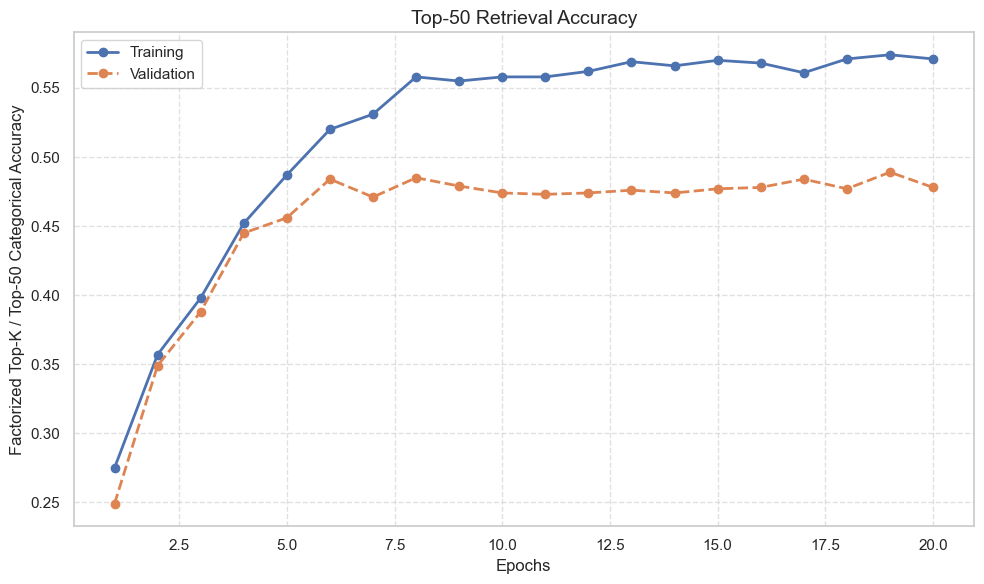

In [ ]:
acc_key = [k for k in history.keys() if 'top_50' in k and 'val' not in k]

if acc_key:
    plot_metrics(history, acc_key[0], "Top-50 Retrieval Accuracy", higher_is_better=True)
else:
    print("Top-100 accuracy metric not found in history. Did you use TFRS Retrieval task?")